In [ ]:
# This is for D600 Task 2

In [76]:
# Pre-step: Evaluate the dataset for a binary target variable
import pandas as pd

# Load the dataset
df = pd.read_csv("D600_Task2_Dataset1_Housing_Information.csv")

# Show first few rows
display(df.head())

# Show column names and unique values for each to find a binary target
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    print(f"{col} ({len(unique_vals)} unique): {unique_vals[:10]}")


,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


ID (7000 unique): [4922 5009 4450 1070  400 5979 3703 2260 6739 2469]
Price (7000 unique): [255614.8992 155586.0947 131050.8324 151361.7125 113167.6128 224973.4118
 169471.5239 265497.8918 146559.7638 148126.1958]
SquareFootage (5574 unique): [ 566.62 1472.34  550.    941.81 1474.99 1069.49  983.26  877.78  691.89
 1120.08]
NumBathrooms (5851 unique): [1.         1.77935416 2.0352542  1.06464387 1.85753249 1.2304581
 2.6120409  3.17990691 1.20038573 2.05534136]
NumBedrooms (7 unique): [4 2 3 1 5 6 7]
BackyardSpace (6779 unique): [779.42 656.13 754.57 439.59 353.03 774.45 757.58 636.64 603.68 206.33]
CrimeRate (4318 unique): [20.56 15.62 12.47 22.22  8.28 25.39 37.84 48.26  5.03 24.37]
SchoolRating (804 unique): [5.62 5.63 9.2  7.08 5.93 4.92 4.4  4.32 5.78 5.18]
AgeOfHome (5094 unique): [ 39.46  40.51  48.38  94.67  16.8   57.62  46.86  60.29 104.34  50.91]
DistanceToCityCenter (3362 unique): [10.08  7.89 23.74  5.22 43.13 19.71  5.73 11.35 42.05 31.04]
EmploymentRate (1610 unique): [9

In [77]:
# Task 2 - C2
import pandas as pd

# Load dataset
df = pd.read_csv("D600_Task2_Dataset1_Housing_Information.csv")

In [78]:
# Subset to selected variables
selected_vars = ['IsLuxury', 'SquareFootage', 'NumBedrooms', 'SchoolRating', 'RenovationQuality']
df_subset = df[selected_vars]

In [79]:
# Get descriptive statistics
descriptive_stats = df_subset.describe(include='all')

# Display the full output
print("Descriptive Statistics for Selected Variables:\n")
display(descriptive_stats)

Descriptive Statistics for Selected Variables:



,IsLuxury,SquareFootage,NumBedrooms,SchoolRating,RenovationQuality
count,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.50400,1048.947459,3.008571,6.942923,5.003357
std,0.50002,426.010482,1.021940,1.888148,1.970428
min,0.00000,550.000000,1.000000,0.220000,0.010000
25%,0.00000,660.815000,2.000000,5.650000,3.660000
50%,1.00000,996.320000,3.000000,7.010000,5.020000
75%,1.00000,1342.292500,4.000000,8.360000,6.350000
max,1.00000,2874.700000,7.000000,10.000000,10.000000


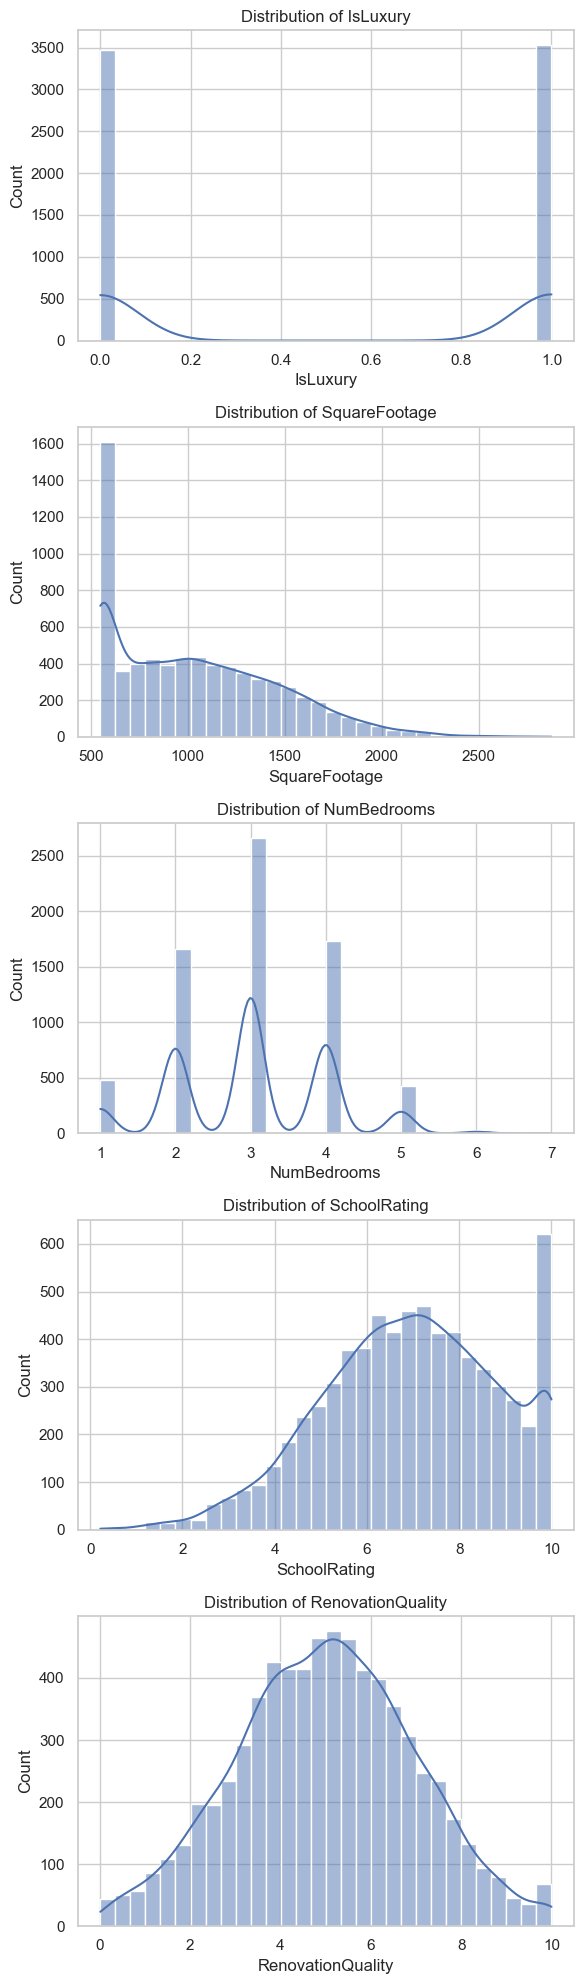

In [80]:
# Task 2 - C3

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each variable
fig, axes = plt.subplots(nrows=5, figsize=(6, 20))
axes = axes.flatten()

variables = ['IsLuxury', 'SquareFootage', 'NumBedrooms', 'SchoolRating', 'RenovationQuality']

for i, var in enumerate(variables):
    sns.histplot(data=df, x=var, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


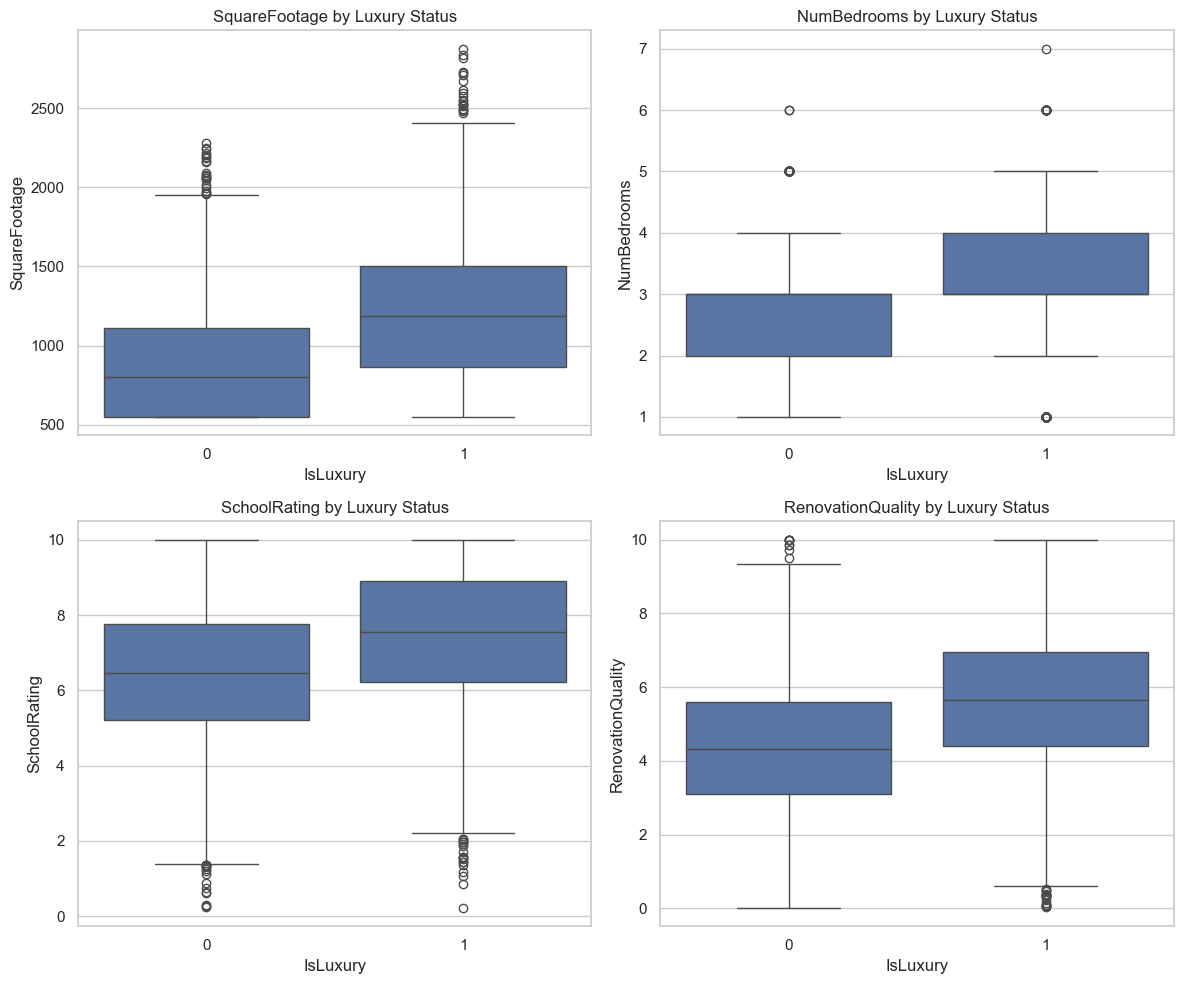

In [81]:
# Task 2 - C4

# Boxplots grouped by IsLuxury
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

predictors = ['SquareFootage', 'NumBedrooms', 'SchoolRating', 'RenovationQuality']

for i, var in enumerate(predictors):
    sns.boxplot(x='IsLuxury', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} by Luxury Status')

plt.tight_layout()
plt.show()


In [82]:
# Task 2 - D1

from sklearn.model_selection import train_test_split

# Select relevant variables
features = ['SquareFootage', 'NumBedrooms', 'SchoolRating', 'RenovationQuality']
target = 'IsLuxury'

# Define X and y
X = df[features]
y = df[target]

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Combine features and target into full training and test sets for export
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Save to CSV for submission
train_set.to_csv("D600_Task2_TrainSet.csv", index=False)
test_set.to_csv("D600_Task2_TestSet.csv", index=False)

print("✅ Data split completed and files saved.")



✅ Data split completed and files saved.


In [83]:
# Task 2 - D2

import statsmodels.api as sm

# Add constant to X_train
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print model summary
print(result.summary())

print("AIC:", result.aic)
print("BIC:", result.bic)


Optimization terminated successfully.
         Current function value: 0.557704
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5595
Method:                           MLE   Df Model:                            4
Date:                Sat, 26 Jul 2025   Pseudo R-squ.:                  0.1954
Time:                        13:08:32   Log-Likelihood:                -3123.1
converged:                       True   LL-Null:                       -3881.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.7812      0.163    -29.399      0.000      -5.100      -4.462
SquareFo

In [84]:
# Task 2 - D3
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict probabilities on training set
y_train_pred_prob = result.predict(X_train_sm)

# Convert probabilities to binary class predictions (threshold = 0.5)
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)

# Generate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nTraining Set Accuracy: {:.4f}".format(accuracy))


Confusion Matrix:
 [[2034  744]
 [ 778 2044]]

Training Set Accuracy: 0.7282


In [85]:
# Task 2 - D4
from sklearn.metrics import confusion_matrix, accuracy_score

# Add intercept to test set
X_test_sm = sm.add_constant(X_test)

# Predict probabilities on test set
y_test_pred_prob = result.predict(X_test_sm)

# Convert to binary predictions
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Confusion matrix and accuracy
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print results
print("Confusion Matrix (Test Set):\n", conf_matrix_test)
print("\nTest Set Accuracy: {:.4f}".format(accuracy_test))


Confusion Matrix (Test Set):
 [[492 202]
 [211 495]]

Test Set Accuracy: 0.7050


In [86]:
# Task 2 - D4 (Testing multicollinearity)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant
X_vif = sm.add_constant(X_train)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

            Variable        VIF
0              const  19.496052
1      SquareFootage   1.195234
2        NumBedrooms   1.199919
3       SchoolRating   1.479175
4  RenovationQuality   1.468176
